In [1]:
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import cv2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


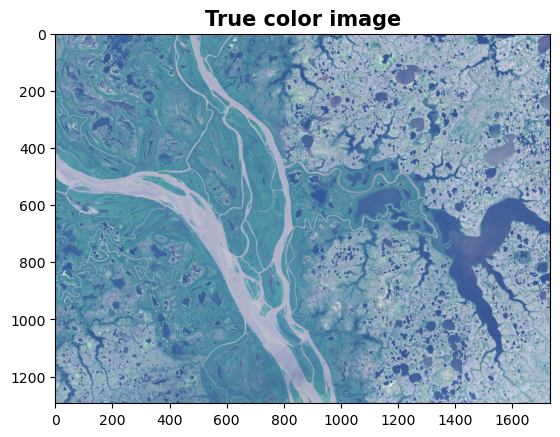

In [2]:
# access folder where image is located C:\Users\franc\Desktop\Corsi\Mapping\KN\Lec2
in_dir = 'C:\\Users\\franc\\Desktop\\Corsi\\Mapping\\KN\\Lec2\\'

dataset = gdal.Open(in_dir + 'yukon.tif')

bands = []

band1 = dataset.GetRasterBand(1) # Blue channel
band2 = dataset.GetRasterBand(2) # Red channel
band3 = dataset.GetRasterBand(3) # Green channel
band4 = dataset.GetRasterBand(4) # NIR channel
band5 = dataset.GetRasterBand(5) # SWIR1 channel
band6 = dataset.GetRasterBand(6) # SWIR2 channel
b1 = band1.ReadAsArray()
b2 = band2.ReadAsArray()
b3 = band3.ReadAsArray()
b4 = band4.ReadAsArray()
b5 = band5.ReadAsArray()
b6 = band6.ReadAsArray()

# Loop through each band and read it into a numpy array
for band_number in range(1, 7):
    band = dataset.GetRasterBand(band_number)
    band_array = band.ReadAsArray()
    bands.append(band_array)

# Stack the bands together into a 3D array
stacked_bands = np.stack(bands, axis=2)

# true image
real_img = np.stack((b3, b2, b1), axis=-1)
min_val = np.min(real_img)*255
max_val = np.max(real_img)*255
const = 255/(max_val - min_val)

real_img = const * (real_img)
plt.imshow(real_img)
plt.title('True color image', fontsize=15, fontweight='bold')
plt.show()

In [3]:
# use cv2.selectROI from OpenCV library to select different training data
# select ROI and press ENTER

real_img = np.dstack((b1, b2, b3))

min_val = np.min(real_img)*255
max_val = np.max(real_img)*255
const = 255/(max_val - min_val)
real_img = const * (real_img)


# select ROI
roi1_w = cv2.selectROI("Select Water",real_img)
cv2.destroyAllWindows()

roi2_w = cv2.selectROI("Select Water",real_img)
cv2.destroyAllWindows()

roi3_w = cv2.selectROI("Select Water",real_img)
cv2.destroyAllWindows()

# select ROI
roi1_l = cv2.selectROI("Select Forest",real_img)
cv2.destroyAllWindows()

roi2_l = cv2.selectROI("Select Forest",real_img)
cv2.destroyAllWindows()

roi3_l = cv2.selectROI("Select Forest",real_img)
cv2.destroyAllWindows()

In [4]:
# Extract spectral values for water ROIs
water_roi1 = stacked_bands[int(roi1_w[1]):int(roi1_w[1] + roi1_w[3]), int(roi1_w[0]):int(roi1_w[0] + roi1_w[2])]
water_roi2 = stacked_bands[int(roi2_w[1]):int(roi2_w[1] + roi2_w[3]), int(roi2_w[0]):int(roi2_w[0] + roi2_w[2])]
water_roi3 = stacked_bands[int(roi3_w[1]):int(roi3_w[1] + roi3_w[3]), int(roi3_w[0]):int(roi3_w[0] + roi3_w[2])]


# Extract spectral values for land ROIs
land_roi1 = stacked_bands[int(roi1_l[1]):int(roi1_l[1] + roi1_l[3]), int(roi1_l[0]):int(roi1_l[0] + roi1_l[2])]
land_roi2 = stacked_bands[int(roi2_l[1]):int(roi2_l[1] + roi2_l[3]), int(roi2_l[0]):int(roi2_l[0] + roi2_l[2])]
land_roi3 = stacked_bands[int(roi3_l[1]):int(roi3_l[1] + roi3_l[3]), int(roi3_l[0]):int(roi3_l[0] + roi3_l[2])]

# Now, you have extracted the spectral values from the stacked_bands image for your ROIs

# Create an empty DataFrame to store the data
data = pd.DataFrame(columns=['Band 1', 'Band 2', 'Band 3', 'Band 4', 'Band 5', 'Band 6', 'Class'])

# Add the spectral values and class labels for water ROIs
for roi in [water_roi1, water_roi2, water_roi3]:
    flattened_roi = roi.reshape(-1, 6)  # Reshape to a 2D array with 6 columns
    roi_df = pd.DataFrame(flattened_roi, columns=['Band 1', 'Band 2', 'Band 3', 'Band 4', 'Band 5', 'Band 6'])
    roi_df['Class'] = 'Water'
    data = pd.concat([data, roi_df], ignore_index=True)

# Add the spectral values and class labels for land ROIs
for roi in [land_roi1, land_roi2, land_roi3]:
    flattened_roi = roi.reshape(-1, 6)  # Reshape to a 2D array with 6 columns
    roi_df = pd.DataFrame(flattened_roi, columns=['Band 1', 'Band 2', 'Band 3', 'Band 4', 'Band 5', 'Band 6'])
    roi_df['Class'] = 'Land'
    data = pd.concat([data, roi_df], ignore_index=True)

from tabulate import tabulate
print(tabulate(data.head(), headers='keys', tablefmt='pretty'))



+---+---------------------+---------------------+---------------------+----------------------+-----------------------+-----------------------+-------+
|   |       Band 1        |       Band 2        |       Band 3        |        Band 4        |        Band 5         |        Band 6         | Class |
+---+---------------------+---------------------+---------------------+----------------------+-----------------------+-----------------------+-------+
| 0 | 0.10424615442752838 | 0.09202307462692261 | 0.0888192281126976  |  0.0463615357875824  | 0.0023692254908382893 | 0.0011846100678667426 | Water |
| 1 | 0.10446153581142426 | 0.09199614822864532 | 0.0889807641506195  | 0.04622691869735718  | 0.002315379213541746  | 0.0011846100678667426 | Water |
| 2 | 0.10413845628499985 | 0.0916999951004982  | 0.0893307700753212  | 0.046469226479530334 | 0.0026653793174773455 | 0.0009153792634606361 | Water |
| 3 | 0.10424615442752838 | 0.0918615385890007  | 0.08911538124084473 | 0.04649614915251732  |

C:\Users\franc\AppData\Local\Temp\ipykernel_11580\2980142829.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, roi_df], ignore_index=True)


(2243796, 6)


c:\Users\franc\anaconda3\envs\ESA\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


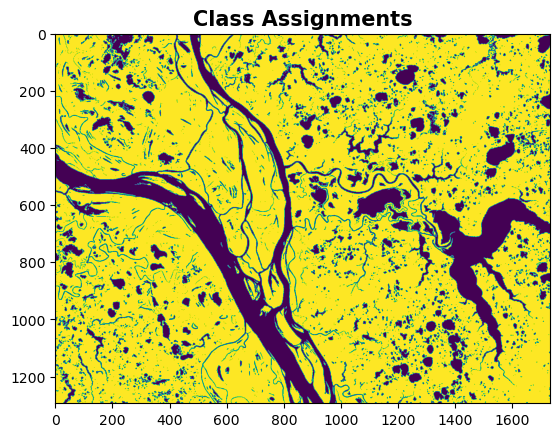

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
import matplotlib as mpl

X = data[['Band 1', 'Band 2', 'Band 3', 'Band 4', 'Band 5', 'Band 6']]
y = data['Class']

# Encode class labels into numerical values
le = LabelEncoder()
y = le.fit_transform(y)


# Create a Logistic Regression classifier
clf = LogisticRegression()  # You can adjust max_iter as needed

# Estimate model parameters based on the training data
clf.fit(X, y)

# Assuming 'stacked_bands' contains your 6-band image
# Predict probabilities for each pixel in the original image
# Reshape the image to match the expected input shape of the model
image_height, image_width, num_bands = stacked_bands.shape
reshaped_image = stacked_bands.reshape(-1, num_bands)
print(reshaped_image.shape)

# Predict probabilities for each pixel
pixel_probabilities = clf.predict_proba(reshaped_image)

# Transform probabilities to assign pixels to classes
# Assign pixels with probabilities < 0.5 to class 0 (Land), and the rest to class 1 (Water)
class_assignments = np.where(pixel_probabilities[:, 0] < 0.5, 0, 1)

# Reshape the class assignments back to the original image shape
class_assignments_image = class_assignments.reshape(image_height, image_width)


# Plot the class assignments
plt.imshow(class_assignments_image)
plt.title('Class Assignments', fontsize=15, fontweight='bold')
plt.show()



(2243796, 6)


c:\Users\franc\anaconda3\envs\ESA\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


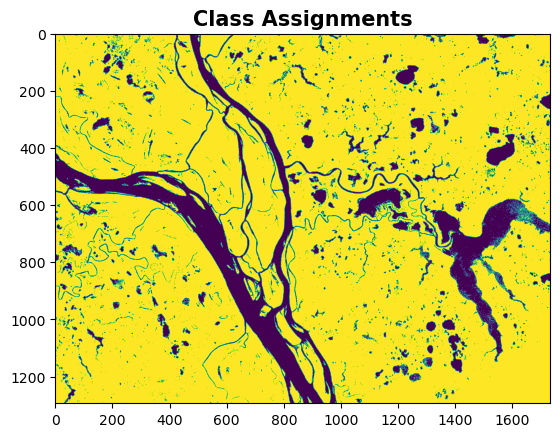

In [6]:
# implement quadratic discriminant analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



# Create a Quadratic Discriminant Analysis classifier
clf = QuadraticDiscriminantAnalysis()

# Estimate model parameters based on the training data
clf.fit(X, y)

# Predict probabilities for each pixel in the original image
# Reshape the image to match the expected input shape of the model
image_height, image_width, num_bands = stacked_bands.shape
reshaped_image = stacked_bands.reshape(-1, num_bands)
print(reshaped_image.shape)

# Predict probabilities for each pixel
pixel_probabilities = clf.predict_proba(reshaped_image)

# Transform probabilities to assign pixels to classes
# Assign pixels with probabilities < 0.5 to class 0 (Land), and the rest to class 1 (Water)
class_assignments = np.where(pixel_probabilities[:, 0] < 0.5, 0, 1)

# Reshape the class assignments back to the original image shape
class_assignments_image = class_assignments.reshape(image_height, image_width)


# Plot the class assignments
plt.imshow(class_assignments_image)
plt.title('Class Assignments', fontsize=15, fontweight='bold')
plt.show()


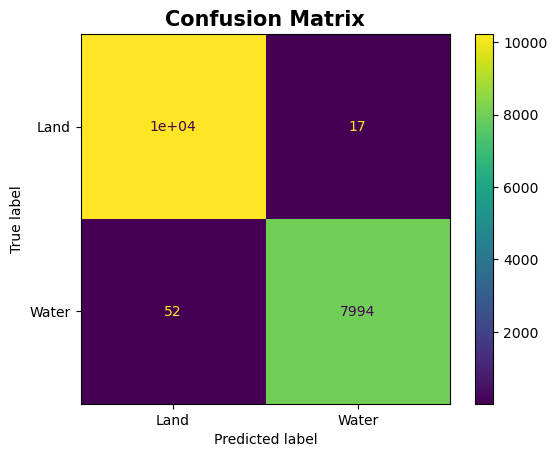

In [7]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y, clf.predict(X))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y, clf.predict(X))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Land', 'Water'])
disp.plot()
plt.title('Confusion Matrix', fontsize=15, fontweight='bold')
plt.show()


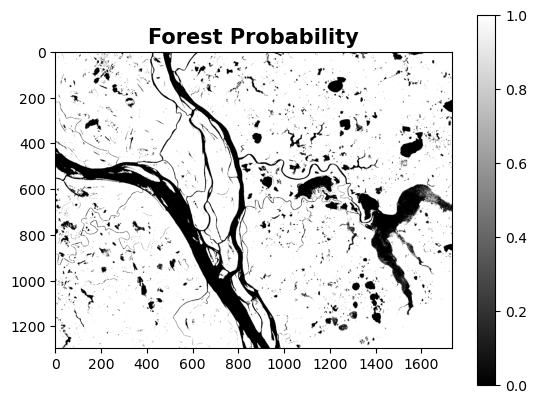

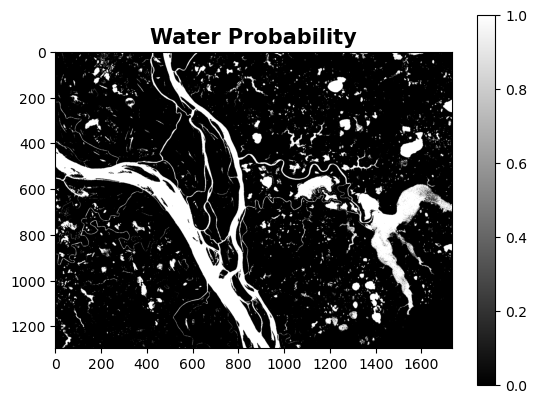

In [9]:
# Plot the probability of each class as images
# Reshape the probabilities to match the original image shape
class_0_probabilities = pixel_probabilities[:, 0].reshape(image_height, image_width)
class_1_probabilities = pixel_probabilities[:, 1].reshape(image_height, image_width)

# Plot the probability of class 0
plt.imshow(class_0_probabilities, cmap='gray')
plt.title('Forest Probability', fontsize=15, fontweight='bold')
plt.colorbar()
plt.show()

# Plot the probability of class 1
plt.imshow(class_1_probabilities, cmap='gray')
plt.colorbar()
plt.title('Water Probability', fontsize=15, fontweight='bold')
plt.show()

